In [1]:
import numpy as np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

# Today we are going to figure out how to properly sample a signal.

Sampling is EVERYWHERE in our society. Your smartphone samples your voice when you are calling someone in order to digitize and send the signal. Your ID card has its signal sampled. Each key on your keyboard is sampled hundreds of times a second in order to see if a key has been pressed or not.
Needless to say, learning how sampling works and learning it well is VERY important.

In [39]:
def sampledemo(sr):
    t = np.linspace(0,10,100)
    f = 0.5
    sinwave = np.sin(2.*np.pi*f*t)
    samplingpoints = np.linspace(0,10,10*sr)
    interpolatedpoints = np.interp(x=samplingpoints,xp=t,fp=sinwave)
    toplotx = np.linspace(0,10,100*sr)
    toploty = sp.interpolate.spline(samplingpoints,interpolatedpoints,toplotx)
    plt.figure()
    plt.plot(toplotx,toploty,'b')
    plt.plot(t,sinwave,'r')
    plt.title("Sampled Signal")
    plt.show()
    plt.figure()
    plt.plot(np.fft.rfft(interpolatedpoints),'b')
    plt.plot(np.fft.rfft(sinwave),'r')
    plt.show()
interact(sampledemo,sr=(0.5,8*0.5));

interactive(children=(FloatSlider(value=2.25, description=u'sr', max=4.0, min=0.5), Output()), _dom_classes=('widget-interact',))

What observation do you make as you move the slider? At what sampling rate can we start to notice the sinusoid? 
$$\text{ sampling rate for seeing sinusoid}$$.

To give you a bit more idea about why this fails pretty catestrophically I have a pretty picture for you:
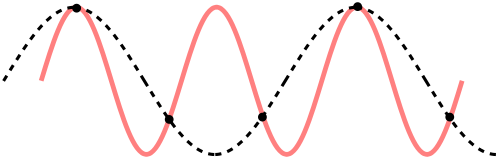

Today we are going to learn a couple of things about sampling.
The first thing first is we are going to learn about the nyquist limit and I think the best way to understand it is from an informaion theory perspective.


How does jitter in our measurement effect our representation of our signal? Suppose we aren't sampling with a fixed $$T$$ period and that instead that $$T$$ jitters all over the place, what happens?

Let's have a look at examples of what aliasing looks in a bunch of different mediums.
Let's examine aliasing when we have music:

Let's have a look at aliasing when we have photos:

People will often say that "highest frequency" and "bandwidth" are the exact same thing for nyquist rate, why is this the case? What can you do to an incoming signal in order to make bandwidth and highest frequency the same thing?
$$ \text{answer here} $$

# Gibbs Phenomena
We are going to look into something known as gibb's phenomena in signal processing.
First, also me to give you a demo showing exactly what Gibb's phenomena is:

In [42]:
def gibbsdemo():
    t = np.linspace(0,40,1000)
    squarewave = signal.square(t,0.5)
    plt.figure()
    plt.plot(squarewave)
    plt.show()
interact(gibbsdemo);

interactive(children=(Output(),), _dom_classes=('widget-interact',))